<a href="https://colab.research.google.com/github/eligugliotta/eligugliotta.github.io/blob/main/regressione_logistica_multinomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [74]:
# Carica i dati dal file CSV
data = pd.read_csv('/content/dati_analisi.tsv', encoding='utf-8', sep="\t")
columns = ['CODE', 'AGE_RANGE', 'GOVERNORATE', 'TYPE', 'GENDER']
data = data[[x for x in data[columns]]]

# Filtra gli '<eos>' da tutte le colonne
data = data.loc[~data[columns].isin(['<eos>']).any(axis=1)]
data

,CODE,AGE_RANGE,GOVERNORATE,TYPE,GENDER
0,arabizi,25-35,Tunis,forum,F
1,arabizi,25-35,Tunis,forum,F
2,arabizi,25-35,Tunis,forum,F
3,arabizi,25-35,Tunis,forum,F
4,arabizi,25-35,Tunis,forum,F
...,...,...,...,...,...
23350,foreign,25-35,Tunis,blog,M
23351,foreign,25-35,Tunis,blog,M
23352,foreign,25-35,Tunis,blog,M
23353,foreign,25-35,Tunis,blog,M


In [75]:
# Separazione delle variabili indipendenti e dipendente
X = data[['TYPE', 'GOVERNORATE', 'AGE_RANGE', 'GENDER']]
y = data[['CODE']]

# Encoding delle variabili categoriche
#le = LabelEncoder()
#X['TYPE'] = le.fit_transform(X['TYPE'])
#X['GOVERNORATE'] = le.fit_transform(X['GOVERNORATE'])
#X['AGE_RANGE'] = le.fit_transform(X['AGE_RANGE'])
#X['GENDER'] = le.fit_transform(X['GENDER'])

    # variabile dipendente
#le = LabelEncoder()
#X['CODE'] = le.fit_transform(X['CODE'])

# Encoding delle variabili categoriche
X['GENDER'] = le.fit_transform(X['GENDER'])
X['GOVERNORATE'] = le.fit_transform(X['GOVERNORATE'])
X['AGE_RANGE'] = le.fit_transform(X['AGE_RANGE'])
X['TYPE'] = le.fit_transform(X['TYPE'])

# Encoding della variabile dipendente
y = le.fit_transform(data['CODE'])

# Converti tutti i nomi delle colonne in stringhe
X.columns = X.columns.astype(str)
X

<ipython-input-75-41b6548a077c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GENDER'] = le.fit_transform(X['GENDER'])
<ipython-input-75-41b6548a077c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GOVERNORATE'] = le.fit_transform(X['GOVERNORATE'])
<ipython-input-75-41b6548a077c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,TYPE,GOVERNORATE,AGE_RANGE,GENDER
0,2,4,2,0
1,2,4,2,0
2,2,4,2,0
3,2,4,2,0
4,2,4,2,0
...,...,...,...,...
23350,0,4,2,1
23351,0,4,2,1
23352,0,4,2,1
23353,0,4,2,1


In [76]:
# Suddivisione dei dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Creazione e addestramento del modello di regressione logistica
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

In [78]:
# Valutazione del modello sul set di test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3271
           1       0.00      0.00      0.00       100
           2       0.27      0.03      0.05       679

    accuracy                           0.80      4050
   macro avg       0.36      0.34      0.31      4050
weighted avg       0.70      0.80      0.73      4050



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


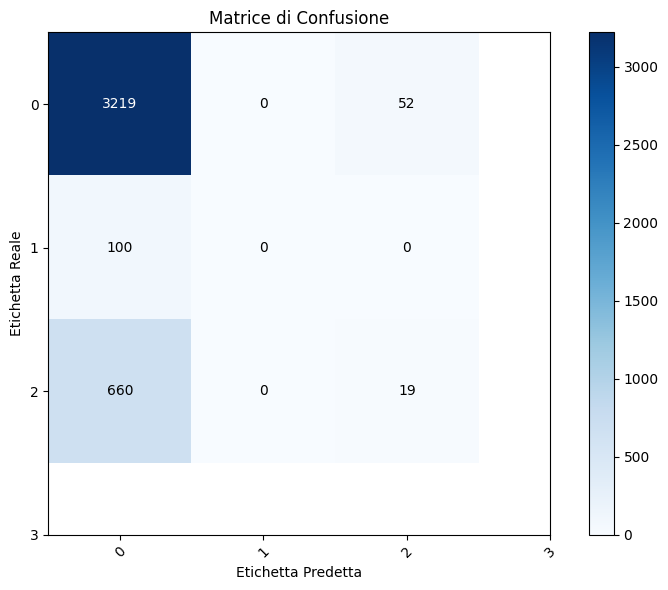

In [79]:
# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Definisci le etichette delle classi
class_labels = ['0', '1', '2', '3']

# Crea il grafico della matrice di confusione
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice di Confusione')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')

# Aggiungi i valori numerici alla matrice di confusione
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

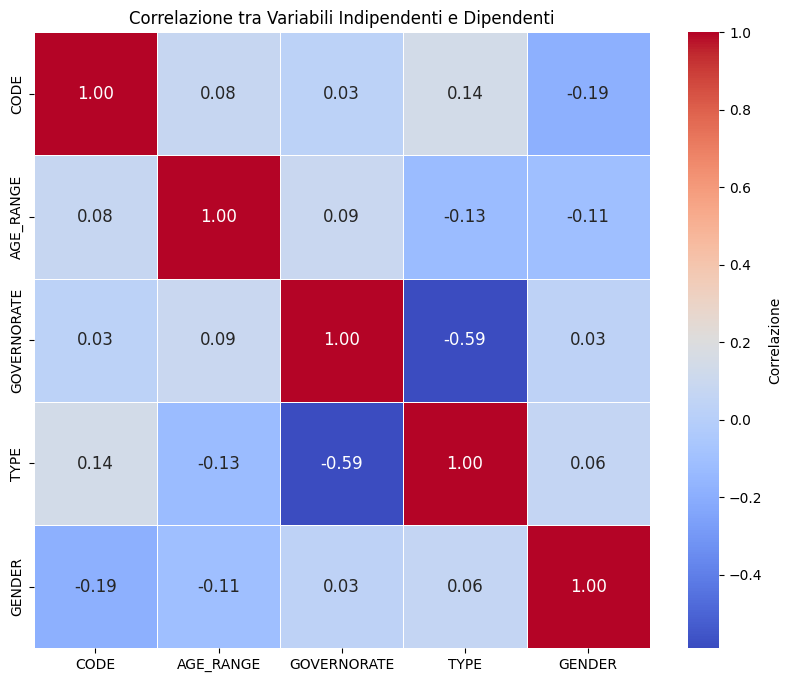

In [81]:
#HEADMAP

# Crea un DataFrame con le variabili indipendenti e dipendenti
data = pd.DataFrame({
    'CODE': y,
    'AGE_RANGE': X['AGE_RANGE'],
    'GOVERNORATE': X['GOVERNORATE'],
    'TYPE': X['TYPE'],
    'GENDER': X['GENDER']
})

# Definisci le classi per ciascuna variabile
classi_variabile = {
    'CODE': ['<eos>', 'arabizi', 'emotag', 'foreign'],
    'AGE_RANGE': ['-25', '/', '25-35', '35-50', '50+', '<eos>'],
    'GOVERNORATE': ['/', '<eos>', 'Europe', 'NO_Tunis', 'Texas', 'Tunis', 'Équateur'],
    'TYPE': ['<eos>', 'blog', 'facebook', 'forum'],
    'GENDER': ['<eos>', 'F', 'M']
}

# Crea una mappa di colori personalizzata basata sulle classi delle variabili
color_map = {
    'CODE': ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'],
    'AGE_RANGE': ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightsalmon', 'lightpink'],
    'GOVERNORATE': ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightsalmon', 'lightpink', 'lightgray'],
    'TYPE': ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'],
    'GENDER': ['lightblue', 'lightgreen', 'lightyellow']
}

# Calcola la matrice di correlazione
corr_matrix = data.corr()

# Crea il grafico della heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar=True, square=True, annot_kws={"size": 12},
            xticklabels=data.columns, yticklabels=data.columns,
            cbar_kws={'label': 'Correlazione'})


# Colora le celle della heatmap in base alle classi delle variabili
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if data.columns[i] != data.columns[j]:
            classe_variabile_i = data.columns[i]
            classe_variabile_j = data.columns[j]
            if classe_variabile_i in classi_variabile and classe_variabile_j in classi_variabile:
                valori_variabile_i = data[classe_variabile_i].unique()
                valori_variabile_j = data[classe_variabile_j].unique()
                if len(valori_variabile_i) == 1 and len(valori_variabile_j) == 1:
                    classe_variabile_i = valori_variabile_i[0]
                    classe_variabile_j = valori_variabile_j[0]
                    if classe_variabile_i in classi_variabile[classe_variabile_i] and classe_variabile_j in classi_variabile[classe_variabile_j]:
                        color_variabile_i = color_map[classe_variabile_i][classi_variabile[classe_variabile_i].index(classe_variabile_i)]
                        color_variabile_j = color_map[classe_variabile_j][classi_variabile[classe_variabile_j].index(classe_variabile_j)]
                        plt.text(j + 0.5, i + 0.5, corr_matrix.iloc[i, j].round(2),
                                 horizontalalignment='center', verticalalignment='center',
                                 color=color_variabile_i if color_variabile_i == color_variabile_j else 'white')

plt.title('Correlazione tra Variabili Indipendenti e Dipendenti')
plt.show()


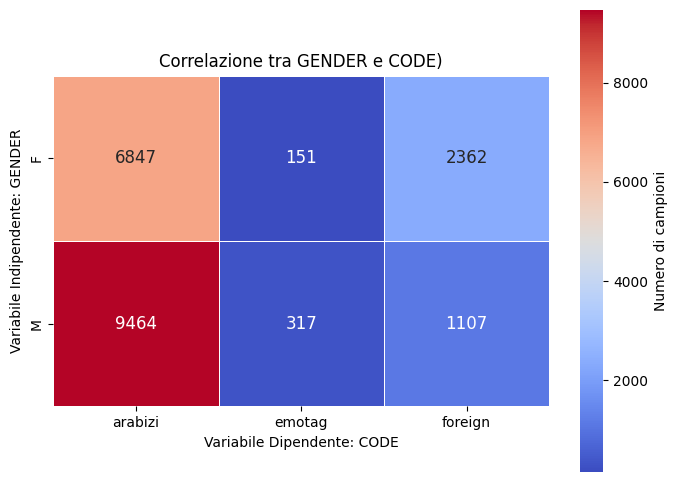

In [84]:
# Mappa delle classi per la variabile 'CODE'
classi_code = ['arabizi', 'emotag', 'foreign']

# Mappa delle classi per la variabile 'GENDER'
classi_gender = ['F', 'M']

# Filtra i dati per escludere i valori '<eos>'
filtered_data = data[(data['CODE'] != '<eos>') & (data['GENDER'] != '<eos>')]

# Calcola la correlazione tra 'GENDER' e 'CODE' per i dati filtrati
correlation_gender_code = filtered_data.groupby(['GENDER', 'CODE']).size().unstack(fill_value=0)

# Crea il grafico della heatmap per 'GENDER' e 'CODE' con i nomi delle classi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_gender_code, annot=True, cmap='coolwarm', fmt="d", linewidths=0.5,
            cbar=True, square=True, annot_kws={"size": 12},
            xticklabels=classi_code, yticklabels=classi_gender,
            cbar_kws={'label': 'Numero di campioni'})

plt.title('Correlazione tra GENDER e CODE)')
plt.xlabel('Variabile Dipendente: CODE')
plt.ylabel('Variabile Indipendente: GENDER')
plt.show()


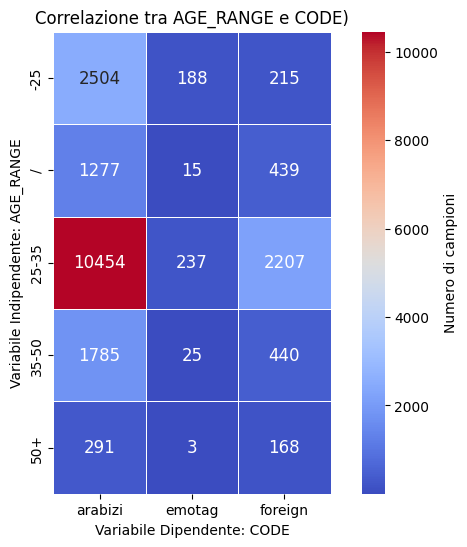

In [85]:
# Mappa delle classi per la variabile 'CODE'
classi_code = ['arabizi', 'emotag', 'foreign']

# Mappa delle classi per la variabile 'GENDER'
classi_gender = ['-25', '/', '25-35', '35-50', '50+']

# Filtra i dati per escludere i valori '<eos>'
filtered_data = data[(data['AGE_RANGE'] != '<eos>') & (data['AGE_RANGE'] != '<eos>')]

# Calcola la correlazione tra 'GENDER' e 'CODE' per i dati filtrati
correlation_gender_code = filtered_data.groupby(['AGE_RANGE', 'CODE']).size().unstack(fill_value=0)

# Crea il grafico della heatmap per 'GENDER' e 'CODE' con i nomi delle classi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_gender_code, annot=True, cmap='coolwarm', fmt="d", linewidths=0.5,
            cbar=True, square=True, annot_kws={"size": 12},
            xticklabels=classi_code, yticklabels=classi_gender,
            cbar_kws={'label': 'Numero di campioni'})

plt.title('Correlazione tra AGE_RANGE e CODE)')
plt.xlabel('Variabile Dipendente: CODE')
plt.ylabel('Variabile Indipendente: AGE_RANGE')
plt.show()

#'AGE_RANGE' = {'-25', '/', '25-35', '35-50', '50+'},
#'GOVERNORATE' = {'/', 'Europe', 'NO_Tunis', 'Texas', 'Tunis', 'Équateur'},
#'TYPE'= {'blog', 'facebook', 'forum'},

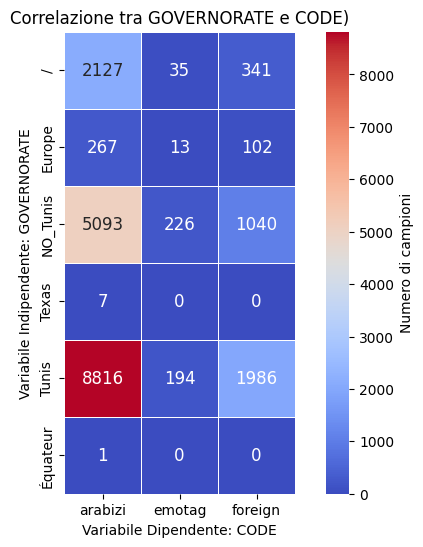

In [86]:
# Mappa delle classi per la variabile 'CODE'
classi_code = ['arabizi', 'emotag', 'foreign']

# Mappa delle classi per la variabile 'GENDER'
classi_gender = ['/', 'Europe', 'NO_Tunis', 'Texas', 'Tunis', 'Équateur']

# Filtra i dati per escludere i valori '<eos>'
filtered_data = data[(data['GOVERNORATE'] != '<eos>') & (data['GOVERNORATE'] != '<eos>')]

# Calcola la correlazione tra 'GENDER' e 'CODE' per i dati filtrati
correlation_gender_code = filtered_data.groupby(['GOVERNORATE', 'CODE']).size().unstack(fill_value=0)

# Crea il grafico della heatmap per 'GENDER' e 'CODE' con i nomi delle classi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_gender_code, annot=True, cmap='coolwarm', fmt="d", linewidths=0.5,
            cbar=True, square=True, annot_kws={"size": 12},
            xticklabels=classi_code, yticklabels=classi_gender,
            cbar_kws={'label': 'Numero di campioni'})

plt.title('Correlazione tra GOVERNORATE e CODE)')
plt.xlabel('Variabile Dipendente: CODE')
plt.ylabel('Variabile Indipendente: GOVERNORATE')
plt.show()

#'TYPE'= {'blog', 'facebook', 'forum'},

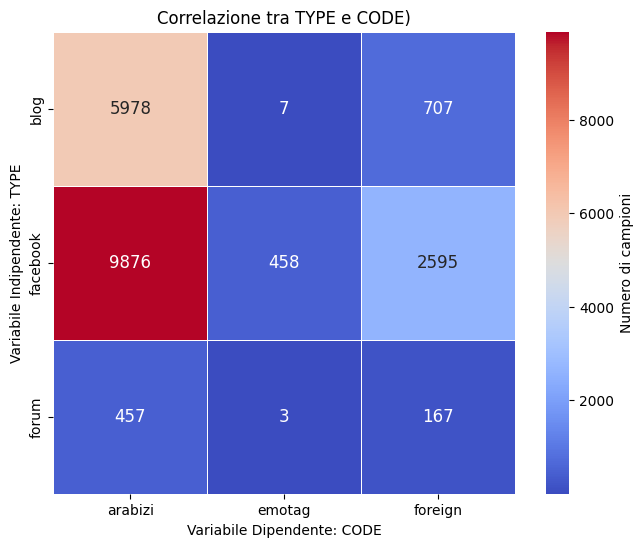

In [87]:
# Mappa delle classi per la variabile 'CODE'
classi_code = ['arabizi', 'emotag', 'foreign']

# Mappa delle classi per la variabile 'GENDER'
classi_gender = ['blog', 'facebook', 'forum']

# Filtra i dati per escludere i valori '<eos>'
filtered_data = data[(data['TYPE'] != '<eos>') & (data['TYPE'] != '<eos>')]

# Calcola la correlazione tra 'TYPE' e 'CODE' per i dati filtrati
correlation_gender_code = filtered_data.groupby(['TYPE', 'CODE']).size().unstack(fill_value=0)

# Crea il grafico della heatmap per 'TYPE' e 'CODE' con i nomi delle classi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_gender_code, annot=True, cmap='coolwarm', fmt="d", linewidths=0.5,
            cbar=True, square=True, annot_kws={"size": 12},
            xticklabels=classi_code, yticklabels=classi_gender,
            cbar_kws={'label': 'Numero di campioni'})

plt.title('Correlazione tra TYPE e CODE)')
plt.xlabel('Variabile Dipendente: CODE')
plt.ylabel('Variabile Indipendente: TYPE')
plt.show()

